# **Presentacion de modelos**

## Por **Ivon Sepulveda**

mail: sepulvedavon@gmail.com

[LinkedIn](https://www.linkedin.com/in/ivon-sepulveda-2aa90645/)



In [83]:
import os
os.getcwd()

'/content'

### Importar los datos

In [3]:
import pandas as pd


df = pd.read_excel('Base_campaña_DC.xlsx')
df


,Id_Cliente,Ciudad,Patrimonio,Ingresos_Mensuales,No_hijos,oficina,fecha_ult_desembolso,monto_credito,tasa,saldo_capital,saldo_Ahorro,Antiguedad_en_meses,Max_dias_mora,plazo_dias,Edad,Acepta_Campaña
0,216966,Barranquilla,13224000,2042480,1,4024,2017-05-14,1500000,33.930,1357387,33438,12,0,900,50,1
1,216967,Barranquilla,13380000,1513835,2,4011,2017-05-02,1500000,33.930,392262,0,12,0,540,59,1
2,216978,Barranquilla,17320000,1594497,0,7032,2017-07-02,1064170,0.296,211724,0,12,0,540,63,1
3,216979,Barranquilla,17439000,1104406,2,7032,2017-05-09,2338552,0.296,828993,0,12,0,720,55,1
4,217028,Barranquilla,41366000,1988538,2,7025,2017-06-07,2385560,33.930,1997956,0,12,0,720,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623,217934,Bogotá,81537000,747054,0,4003,2017-04-13,9000000,33.930,7810084,18603,120,0,1080,53,1
2624,218152,Bogotá,81537000,2149601,0,4003,2017-04-13,8900000,33.930,7810084,18603,120,0,1080,53,1
2625,217713,Bogotá,84578000,1952025,2,4030,2017-04-29,9000000,33.930,9000000,19713,120,0,720,52,0
2626,217931,Bogotá,79817000,747054,2,4030,2017-04-29,9000000,33.930,9000000,19713,120,0,720,52,1


In [723]:
df_1 = pd.read_excel('Base_nueva_DC.xlsx')
df_1

,Id_Cliente,Ciudad,Patrimonio,Ingresos_Mensuales,No_hijos,oficina,fecha_ult_desembolso,monto_credito,tasa,saldo_capital,saldo_Ahorro,Antiguedad_en_meses,Max_dias_mora,plazo_dias,Edad
0,427658,Cartagena,745968,1614094,0,4024,2017-12-30,1500000,33.930000,1357387,33438,12,0,900,65
1,427659,Barranquilla,834415,920234,1,4011,2017-12-18,1500000,33.930000,392262,0,12,0,540,40
2,427670,Barranquilla,1164858,1568317,1,7032,2018-02-17,1064170,0.295732,211724,0,12,0,540,36
3,427671,Cali,1187587,796660,1,7032,2017-12-25,2338552,0.295732,828993,0,12,0,720,47
4,427720,Cartagena,2840488,1474771,0,7025,2018-01-23,2385560,33.930000,1997956,0,12,0,720,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,428626,Cartagena,37964203,477534,1,4003,2017-11-29,9000000,33.930000,7810084,18603,120,0,1080,30
1496,428844,Barranquilla,46168677,1516403,0,4003,2017-11-29,8900000,33.930000,7810084,18603,120,0,1080,44
1497,428405,Bogotá,28739705,848160,1,4030,2017-12-15,9000000,33.930000,9000000,19713,120,0,720,41
1498,428623,Cali,37858892,1041188,2,4030,2017-12-15,9000000,33.930000,9000000,19713,120,0,720,48


In [724]:
df.shape

(2628, 17)

In [726]:
df_1.shape

(1500, 15)

In [86]:
df.columns

Index(['Id_Cliente', 'Ciudad', 'Patrimonio', 'Ingresos_Mensuales', 'No_hijos',
       'oficina', 'fecha_ult_desembolso', 'monto_credito', 'tasa',
       'saldo_capital', 'saldo_Ahorro', 'Antiguedad_en_meses', 'Max_dias_mora',
       'plazo_dias', 'Edad', 'Acepta_Campaña'],
      dtype='object')

In [87]:
df.columns

Index(['Id_Cliente', 'Ciudad', 'Patrimonio', 'Ingresos_Mensuales', 'No_hijos',
       'oficina', 'fecha_ult_desembolso', 'monto_credito', 'tasa',
       'saldo_capital', 'saldo_Ahorro', 'Antiguedad_en_meses', 'Max_dias_mora',
       'plazo_dias', 'Edad', 'Acepta_Campaña'],
      dtype='object')

In [88]:
df['Acepta_Campaña'].value_counts()

0    1322
1    1306
Name: Acepta_Campaña, dtype: int64

In [19]:
df.dtypes

Id_Cliente                       int64
Ciudad                          object
 Patrimonio                      int64
 Ingresos_Mensuales              int64
No_hijos                         int64
oficina                          int64
fecha_ult_desembolso    datetime64[ns]
monto_credito                    int64
tasa                           float64
saldo_capital                    int64
saldo_Ahorro                     int64
Antiguedad_en_meses              int64
Max_dias_mora                    int64
plazo_dias                       int64
Edad                             int64
Acepta_Campaña                   int64
dtype: object

In [21]:
X = df.drop(['Acepta_Campaña'], axis=1)

In [22]:
X.head()

,Id_Cliente,Ciudad,Patrimonio,Ingresos_Mensuales,No_hijos,oficina,fecha_ult_desembolso,monto_credito,tasa,saldo_capital,saldo_Ahorro,Antiguedad_en_meses,Max_dias_mora,plazo_dias,Edad
0,216966,Barranquilla,13224000,2042480,1,4024,2017-05-14,1500000,33.930,1357387,33438,12,0,900,50
1,216967,Barranquilla,13380000,1513835,2,4011,2017-05-02,1500000,33.930,392262,0,12,0,540,59
2,216978,Barranquilla,17320000,1594497,0,7032,2017-07-02,1064170,0.296,211724,0,12,0,540,63
3,216979,Barranquilla,17439000,1104406,2,7032,2017-05-09,2338552,0.296,828993,0,12,0,720,55
4,217028,Barranquilla,41366000,1988538,2,7025,2017-06-07,2385560,33.930,1997956,0,12,0,720,45


### Limpieza de datos

Se detecta que hay tasas inferiores a 1 y tasas alrededor de 30, se evidencia que unas tasas esta de 0 a 1 y otras de 0 a 100, entonces se procede a dejar una misma estructura

In [116]:
df.loc[df.tasa<1,'tasa']= df.tasa*100
df.loc[df.tasa>=1,'tasa']= df.tasa




In [117]:
df.head()

,Id_Cliente,Ciudad,Patrimonio,Ingresos_Mensuales,No_hijos,oficina,fecha_ult_desembolso,monto_credito,tasa,saldo_capital,saldo_Ahorro,Antiguedad_en_meses,Max_dias_mora,plazo_dias,Edad,Acepta_Campaña,tasa1
0,216966,Barranquilla,13224000,2042480.0,1,4024,2017-05-14,1500000,33.93,1357387,33438,12,0,900,50,1,33.93
1,216967,Barranquilla,13380000,1513835.0,2,4011,2017-05-02,1500000,33.93,392262,0,12,0,540,59,1,33.93
2,216978,Barranquilla,17320000,1594497.0,0,7032,2017-07-02,1064170,29.60,211724,0,12,0,540,63,1,29.60
3,216979,Barranquilla,17439000,1104406.0,2,7032,2017-05-09,2338552,29.60,828993,0,12,0,720,55,1,29.60
4,217028,Barranquilla,41366000,1988538.0,2,7025,2017-06-07,2385560,33.93,1997956,0,12,0,720,45,0,33.93


In [727]:
df_1.loc[df_1.tasa<1,'tasa']= df_1.tasa*100
df_1.loc[df_1.tasa>=1,'tasa']= df_1.tasa

## Revision de variables con valores atipicos

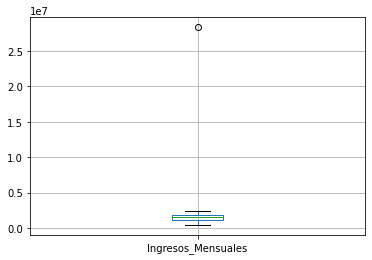

In [89]:
df.boxplot(column=['Ingresos_Mensuales'])

Se detecta un cliente que tiene ingresos superiores a 28 millones, el cual esta por fuera de la distribucion.

Se plantea calcular el ingreso promedio de los clientes de la siguiente manera

In [90]:
ingresos_mean = df['Ingresos_Mensuales'].mean()
ingresos_mean

1499859.4349315069

Con el promedio, se decide imputar el dato atipico. Dado que solo es un elemento entonces se procede a imputar este valor con el promedio de los datos

In [91]:
df.loc[df['Ingresos_Mensuales']>28000000,'Ingresos_Mensuales']= ingresos_mean
df.loc[df['Ingresos_Mensuales']<=28000000,'Ingresos_Mensuales']= df['Ingresos_Mensuales']

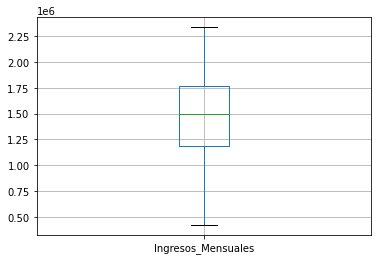

In [93]:
df.boxplot(column=['Ingresos_Mensuales'])

Al volver a calcular la distribucion de los ingresos entonces se observa que todo esta dentro de la distribucion natural de los datos.

### Descripcion de los datos

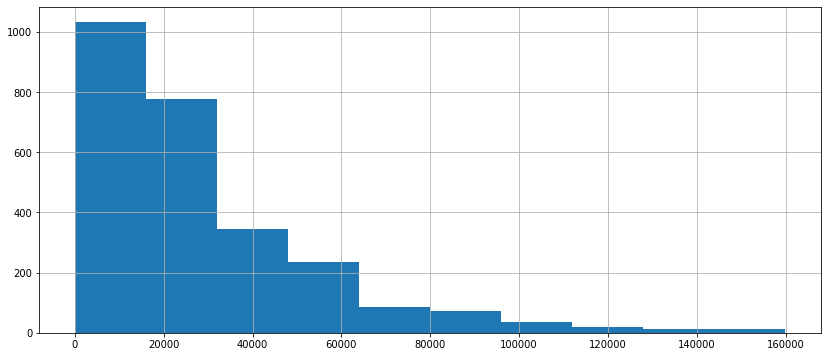

In [5]:
df.saldo_Ahorro.hist(figsize = (14,6))


In [ ]:
df.saldo_capital.hist(figsize = (14,6))

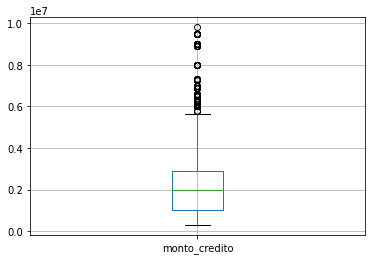

In [6]:
df.boxplot(column=['monto_credito'])



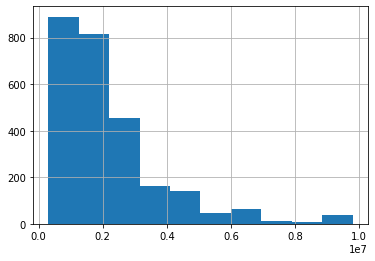

In [95]:
df['monto_credito'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb93448d710>,
      dtype=object)

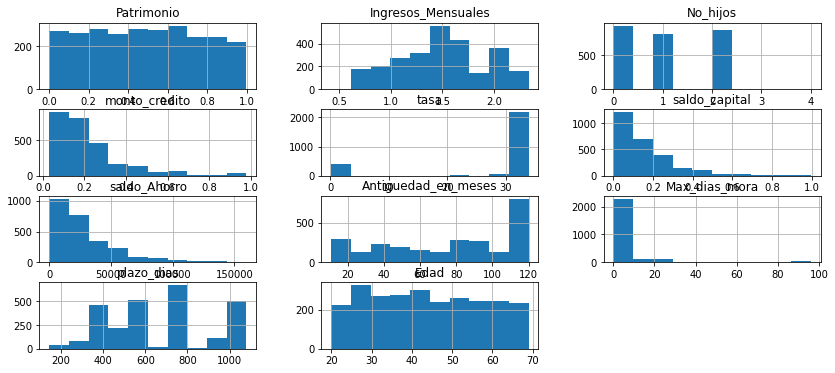

In [99]:
df[["Patrimonio","Ingresos_Mensuales","No_hijos", "monto_credito" , "tasa", "saldo_capital", "saldo_Ahorro", "Antiguedad_en_meses", "Max_dias_mora" , "plazo_dias", "Edad"]].hist(figsize = (14,6))


In [103]:
df['Patrimonio'].mean()

48824658.48363775

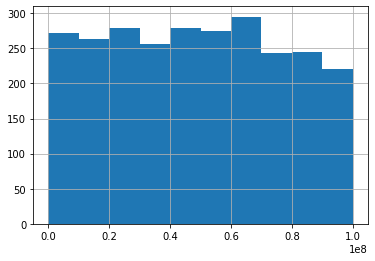

In [102]:
df['Patrimonio'].hist()

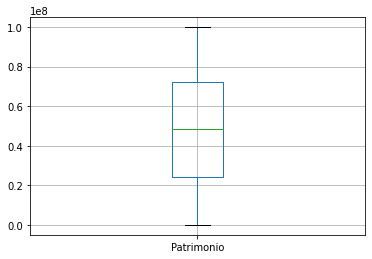

In [105]:
df.boxplot(column=['Patrimonio'])

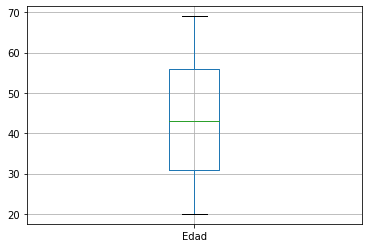

In [109]:
df.boxplot(column=['Edad'])

In [118]:
df[["Patrimonio","Ingresos_Mensuales","No_hijos", "monto_credito" , "tasa", "saldo_capital", "saldo_Ahorro", "Antiguedad_en_meses", "Max_dias_mora" , "plazo_dias", "Edad"]].describe()

,Patrimonio,Ingresos_Mensuales,No_hijos,monto_credito,tasa,saldo_capital,saldo_Ahorro,Antiguedad_en_meses,Max_dias_mora,plazo_dias,Edad
count,2.628000e+03,2.628000e+03,2628.000000,2.628000e+03,2628.000000,2.628000e+03,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000
mean,4.882466e+07,1.489648e+06,0.983638,2.211341e+06,33.029893,1.621323e+06,28469.953957,76.208904,4.732116,653.219178,43.796423
std,2.809800e+07,4.167645e+05,0.836978,1.666275e+06,2.031524,1.452214e+06,26320.431987,36.808160,14.978724,259.991600,14.210341
min,9.681700e+04,4.212630e+05,0.000000,3.000000e+05,20.500000,1.871400e+04,0.000000,11.000000,0.000000,144.000000,20.000000
25%,2.428450e+07,1.185693e+06,0.000000,1.031210e+06,33.930000,6.491560e+05,9474.000000,43.000000,0.000000,450.000000,31.000000
50%,4.876700e+07,1.493587e+06,1.000000,2.000000e+06,33.930000,1.105952e+06,20631.000000,82.000000,0.000000,600.000000,43.000000
75%,7.249300e+07,1.768731e+06,2.000000,2.896255e+06,33.930000,2.093885e+06,39369.000000,117.000000,0.000000,720.000000,56.000000
max,9.990100e+07,2.336623e+06,4.000000,9.800000e+06,33.930000,9.925519e+06,159843.000000,120.000000,96.000000,1080.000000,69.000000


# Modelos de clasificacion

## Modelo de Regresion Logistica

In [309]:
# X = df[["Ciudad", "Patrimonio","Ingresos_Mensuales","No_hijos", "monto_credito" , "tasa", "saldo_capital", "saldo_Ahorro", "Antiguedad_en_meses", "Max_dias_mora" , "plazo_dias", "Edad"]]
X = df[["Patrimonio","Ingresos_Mensuales","No_hijos", "monto_credito" , "tasa", "saldo_capital", "saldo_Ahorro", "Antiguedad_en_meses", "Max_dias_mora" , "plazo_dias", "Edad"]]

In [310]:
X.shape

(2628, 11)

In [311]:
y= df["Acepta_Campaña"]

In [312]:
y.shape

(2628,)

In [362]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn import metrics
 from_predictions
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [319]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [328]:
model = linear_model.LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [331]:
predictions = model.predict(X_validation)


In [412]:
predictions[0:10]

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [350]:
model.score(X_validation,Y_validation)

0.5057034220532319

In [334]:
sklearn.metrics.confusion_matrix(Y_validation, predictions)

array([[221,  32],
       [228,  45]])

In [335]:
sklearn.metrics.accuracy_score(Y_validation, predictions)

0.5057034220532319

In [336]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')


In [338]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.5057034220532319


In [339]:
prob = model.predict_proba(X_validation)

In [341]:
prob = prob[:, 1]

In [346]:
prob[0:10]

array([0.48774889, 0.49769219, 0.52284856, 0.46413778, 0.46370392,
       0.48280386, 0.56032254, 0.50651575, 0.48259988, 0.47880919])

# **Arboles de Decision**


### Librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

### **Arbol de decision**

In [768]:
mod3_Tree = DecisionTreeRegressor(
            max_depth         = 5,
            random_state      = 123
          )
mod3_Tree.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5, random_state=123)

Se corrio varios modelos haciendo la estimacion de parametros con:
- max_depth superior 5 genera overrfitting, con lo cual se maximiza el accuracy con profundidad 5

In [769]:
prob_train = mod3_Tree.predict(X_train)
predictions_train=prob_train.round()
print (sklearn.metrics.accuracy_score(Y_train, predictions_train))

prob = mod3_Tree.predict(X_validation)
predictions=prob.round()
print (sklearn.metrics.accuracy_score(Y_validation, predictions))

0.7093244529019981
0.7015209125475285


In [623]:
fper, tper, thresholds = roc_curve(Y_validation, prob)

In [770]:
roc_auc = metrics.auc(fper, tper)
roc_auc

0.7930113364895972

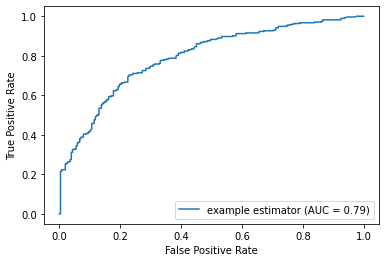

In [771]:
display = metrics.RocCurveDisplay(fpr=fper, tpr=tper, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()

Se corren varios modelos y se observa que con una profundidad de 5 se obtienen buenas metricas en el train y test de la muestra

In [774]:
Y_validation.mean()

0.5190114068441065

In [772]:
sklearn.metrics.confusion_matrix(Y_validation, predictions)

array([[178,  75],
       [ 82, 191]])

## **Random Forest**

In [701]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

Modelo de Random Forest

In [775]:
clf = RandomForestClassifier(n_jobs=-1, n_estimators=40, max_depth=5)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, n_estimators=40, n_jobs=-1)

Se corrio varios modelos haciendo la estimacion de parametros con:
- n_estimators y max_depth, se encontro que con n_estimators a partir de 40 genera overfitting.

- El otro parametro que se estimo fue max_depth y se encontro que a partir de profundidad 6 o + genera overfitting el modelo. 

- El modelo final lo tome con n_estimators = 40 y max_depth =4

Crosvalidacion

In [776]:
cross_val_score(clf, X_validation, Y_validation, cv=10)

array([0.66037736, 0.69811321, 0.67924528, 0.71698113, 0.62264151,
       0.69811321, 0.57692308, 0.75      , 0.57692308, 0.69230769])

In [777]:
cross_val_score(clf, X_validation, Y_validation, cv=10).mean()

0.6882075471698113

In [778]:
predictions_train = clf.predict(X_train)
predictions = clf.predict(X_validation)
prob_train = clf.predict_proba(X_train)
prob = clf.predict_proba(X_validation)
prob_train = prob_train[:, 1]
prob = prob[:, 1]
print (sklearn.metrics.accuracy_score(Y_train, predictions_train).round(2))
print (sklearn.metrics.accuracy_score(Y_validation, predictions).round(2))

0.75
0.75


In [779]:
sklearn.metrics.confusion_matrix(Y_validation, predictions)

array([[194,  59],
       [ 73, 200]])

In [787]:
fper, tper, thresholds = roc_curve(Y_validation, prob)
roc_auc = metrics.auc(fper, tper)
roc_auc

0.8050862181296965

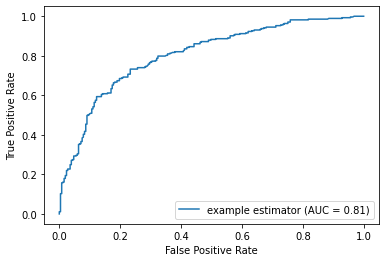

In [788]:
display = metrics.RocCurveDisplay(fpr=fper, tpr=tper, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()

# **XG Boost**

In [531]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [782]:
model = xgb.XGBClassifier(n_estimators=50, max_depth=3)
model.fit(X_train,Y_train)
expected_y = Y_validation
expected_y_train = Y_train

predict_y_train = model.predict(X_train)
print(metrics.classification_report(expected_y_train, predict_y_train))
predict_y = model.predict(X_validation)
print(metrics.classification_report(expected_y, predict_y))



              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1069
           1       0.76      0.74      0.75      1033

    accuracy                           0.76      2102
   macro avg       0.76      0.76      0.76      2102
weighted avg       0.76      0.76      0.76      2102

              precision    recall  f1-score   support

           0       0.71      0.78      0.75       253
           1       0.78      0.71      0.74       273

    accuracy                           0.74       526
   macro avg       0.75      0.74      0.74       526
weighted avg       0.75      0.74      0.74       526



Se corrio varios modelos haciendo la estimacion de parametros con:
- n_estimators y max_depth, se encontro que con n_estimators a partir de 50 genera overfitting.

- El otro parametro que se estimo fue max_depth y se encontro que a partir de profundidad 4 o + genera overfitting el modelo. 

- El modelo final lo tome con n_estimators = 50 y max_depth =3

El Accuracy de la matriz de confusion es:

In [783]:
print (sklearn.metrics.accuracy_score(expected_y_train, predict_y_train))
print (sklearn.metrics.accuracy_score(expected_y, predict_y))

0.758325404376784
0.7433460076045627


In [784]:
prob_xgb = model.predict_proba(X_validation)
prob_xgb = prob_xgb[:, 1]
prob_xgb [0:10]

array([0.37406895, 0.77984804, 0.60007095, 0.32587355, 0.23150179,
       0.5380861 , 0.7182454 , 0.48265526, 0.47724488, 0.86141366],
      dtype=float32)

In [786]:
sklearn.metrics.confusion_matrix(Y_validation,predict_y )


array([[198,  55],
       [ 80, 193]])

In [598]:
fper, tper, thresholds = roc_curve(Y_validation, prob_xgb)

La curva ROC es de:

In [593]:
roc_auc = metrics.auc(fper, tper)
roc_auc

0.8321533538924843

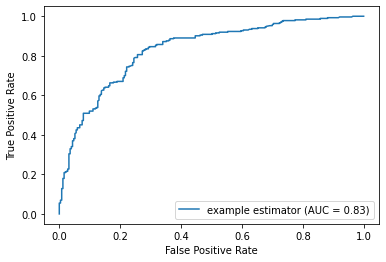

In [594]:
display = metrics.RocCurveDisplay(fpr=fper, tpr=tper, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()

# **Prediccion**

In [730]:
X1 = df_1[["Patrimonio","Ingresos_Mensuales","No_hijos", "monto_credito" , "tasa", "saldo_capital", "saldo_Ahorro", "Antiguedad_en_meses", "Max_dias_mora" , "plazo_dias", "Edad"]]
X1.head()

,Patrimonio,Ingresos_Mensuales,No_hijos,monto_credito,tasa,saldo_capital,saldo_Ahorro,Antiguedad_en_meses,Max_dias_mora,plazo_dias,Edad
0,745968,1614094,0,1500000,33.9300,1357387,33438,12,0,900,65
1,834415,920234,1,1500000,33.9300,392262,0,12,0,540,40
2,1164858,1568317,1,1064170,29.5732,211724,0,12,0,540,36
3,1187587,796660,1,2338552,29.5732,828993,0,12,0,720,47
4,2840488,1474771,0,2385560,33.9300,1997956,0,12,0,720,56


**Se realiza la prediccion con el random Forest**

In [811]:
prob = clf.predict_proba(X1)
prob = prob[:, 1]

In [812]:
prob

array([0.63844358, 0.48684483, 0.30960704, ..., 0.58873024, 0.56841871,
       0.4825384 ])

In [813]:
prob = pd.DataFrame(prob)
prob.head()

**se calculan los distintos grupos de 200 300 y 1000 segun el supuesto que se realiza**

In [856]:
# Clientes a contactar telefonicamente
target1 = prob[prob[0]>0.6235]

print (target1.shape)
print (target1.mean())

(200, 1)
0    0.674885
dtype: float64


La probabilidad en este grupo de 200 clientes es de 0.674885, es decir que se esperan 135 compradores

In [854]:
# Clientes a enviar por el paquete de $2500 de costo
target2 = prob[(prob[0]<=0.6235) & (prob[0]>0.55)] 
print (target2.shape)
print (target2.mean())

(299, 1)
0    0.584739
dtype: float64


La probabilidad en este grupo de 300 clientes es de 0.584739, es decir que se esperan 175 compradores

In [855]:
# Clientes a enviar por el maximo costo
target3 = prob[(prob[0]<=0.55) & (prob[0]>0.5)] 
print (target3.shape)
print (target3.mean())

(333, 1)
0    0.523557
dtype: float64


La probabilidad en este grupo de 1000 clientes es de 0.523557, es decir que se esperan 524 compradores

## Fin del Analisis